<a href="https://colab.research.google.com/github/wertrew21/programming-practice/blob/ikote/6_%EB%8B%A4%EC%9D%B4%EB%82%98%EB%AF%B9_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 다이나믹 프로그래밍: \
메모리를 적절히 사용, 수행 시간 효율성을 비약적으로 향상시키는 방법. **이미 계산된 결과(작은 문제)는 별도의 메모리 영역에 저장, 다시 계산하지 않도록** 한다. \

- 다이나믹 프로그래밍 사용 조건:
1. 최적 부분 구조 : 큰 문제를 작은 문제로 나누며, 작은 문제의 답을 모아 큰 문제를 해결
2. 중복되는 부분 문제 : 동일한 작은 문제를 반복적으로 해결

In [ ]:
# 피보나치 수열: 단순 재귀 소스코드

def fibo(x):
    if x == 1 or x == 2:
        return 1
    else: return fibo(x-1) + fibo(x-2)

print(fibo(6))

8


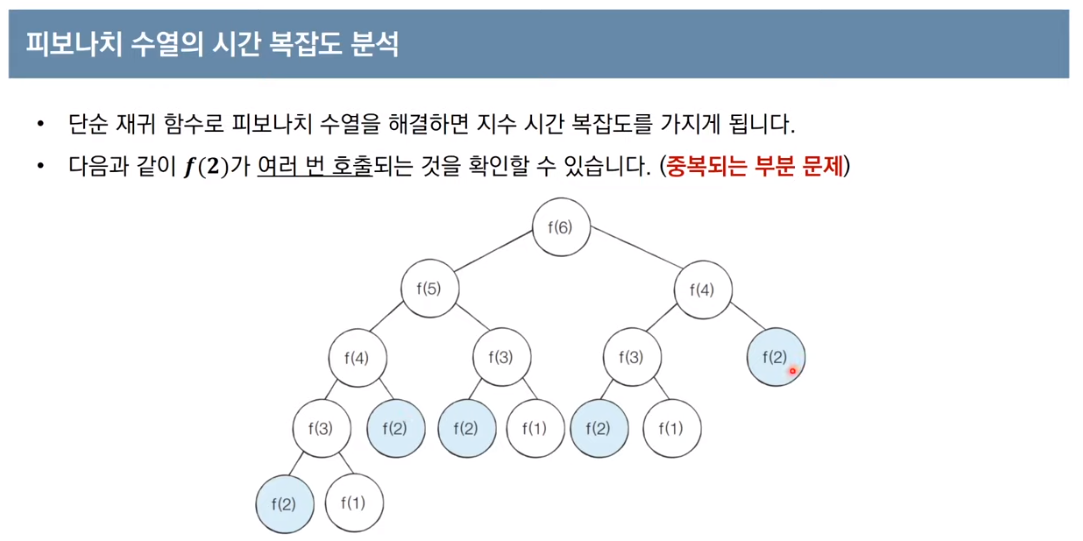

### 하향식 동적 계획법 (탑다운)
: 큰 문제를 해결하기 위해 작은 문제의 해결 방법을 재귀적으로 호출, \
작은 문제를 합쳤을 때 큰 문제의 해결법이 된다. 한번 계산된 계산 결과를 저장하기 위해 저장. \
큰 수를 함수에 입력하면 작은 수의 문제들을 재귀적으로 호출하면서 문제를 해결.

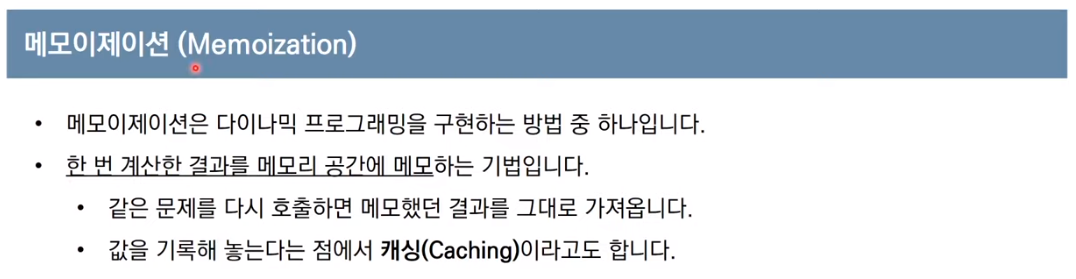

### 상향식 동적 계획법 (보텀업)
: 작은 문제를 해결하고, 먼저 계산했던 문제들의 값을 해결해서 그 다음 문제들을 해결해 나가는 방법. \
반복문을 이용하여 작은 수 -> 큰 수로 나아가며 문제를 해결.

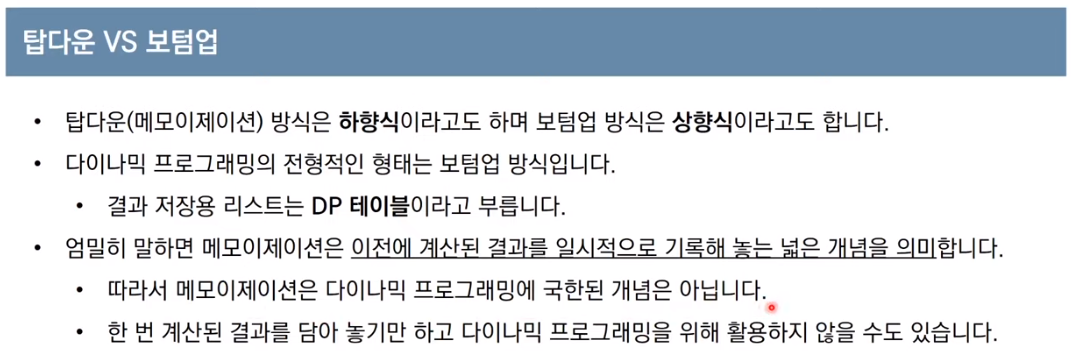

In [ ]:
# 피보나치 수열: 탑다운 다이나믹 프로그래밍 소스코드

import time
start = time.time()
# 한 번 계산된 결과를 메모이제이션하기 위한 리스트 초기화
d = [0] * 100

# 피보나치 함수를 재귀함수로 구현(탑다운)
def fibo(x):
    if x == 1 or x == 2:
        return 1
    # 이미 계산한 적 있는 문제라면 그대로 반환   <-- 이 조건문으로 인해 빠른 연산
    if d[x] != 0:
        return d[x]
    # 아직 계산하지 않은 문제라면 점화식에 따라서 피보나치 결과 반환
    d[x] = fibo(x-1) + fibo(x-2)
    return d[x]

print(fibo(99))
print(time.time() - start)

# fibo(99)를 구하기 위해 fibo(98)과 fibo(97)을 구해서 더함.
# <-- fibo(98)과 fibo(97)은 각각 fibo(97), fibo(96) // fibo(96), fibo(95)
#     를 구해서 더한 것.
# 이렇게 큰 문제를 구하기 위해 작은 문제들을 더해 나가는 방식 = 탑다운

218922995834555169026
0.00029397010803222656


In [ ]:
# 재귀함수를 이용한 피보나치 수열
start = time.time()
def fibo(x):
    if x == 1 or x == 2:
        return 1
    return fibo(x-1) + fibo(x-2)

print(fibo(30))
print(time.time() - start)

# 30번째 피보나치 수열을 구하는데도 탑다운 방식에 비해 1000배 이상의 계산시간 소요!

832040
0.20903944969177246


In [ ]:
# 피보나치 수열: 보텀업 다이나믹 프로그래밍 소스코드
start = time.time()
d = [0] * 100

d[1] = 1
d[2] = 1
n = 99

# 피보나치 함수를 반복문으로 구현
for i in range(3, n+1):
    d[i] = d[i-1] + d[i-2]

print(d[n])
print(time.time() - start)

218922995834555169026
0.0006756782531738281


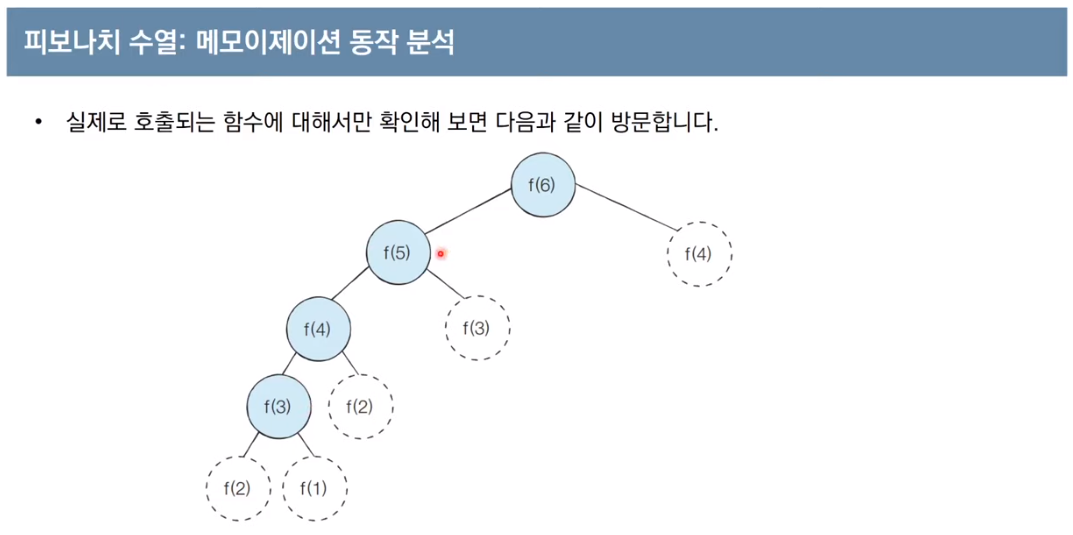

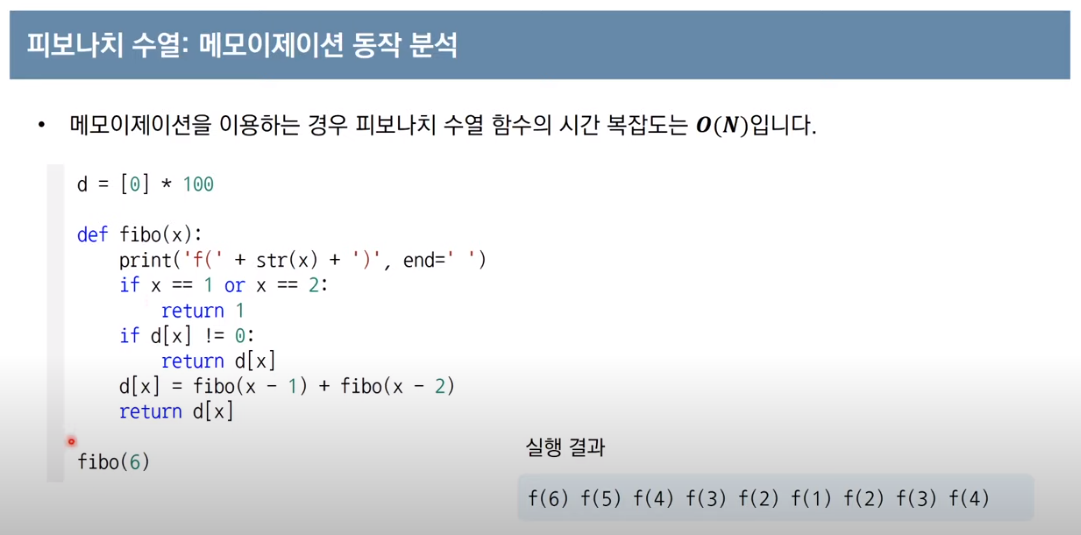

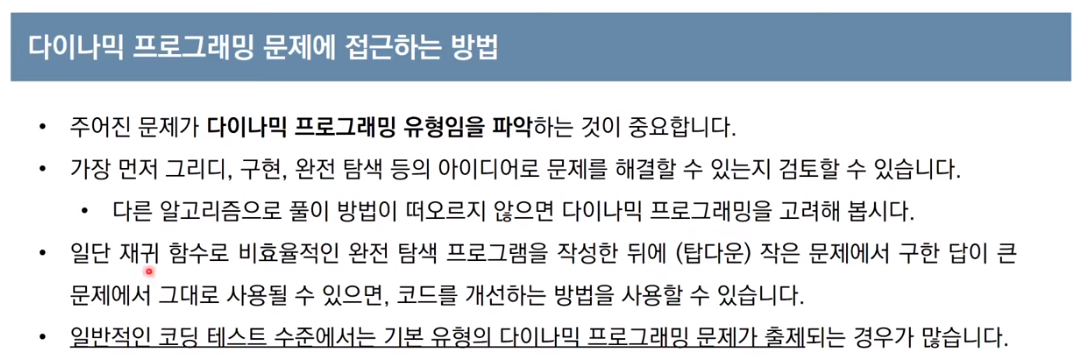

계산 소요 시간이 클 시 다이나믹 프로그래밍 적용을 고려해볼 수 있다.

In [ ]:
# <문제> 개미 전사

# 시작지점 start = 1 or 2
# 1 3 1 5 6 5 2 4

# m = [0] * (2 ** ((n-1)//2))
# m = [0] * n

def mf(x):
    # 모든 식량창고의 식량k가 0이면 0 반환
    if sum(a) == 0: return 0
    # n = 3이면 아래값 반환
    if n == 3: return max(a[0]+a[2], a[1])
    if x == n-2:
        return max(a[n-2], a[n-1])
    if x == n-1:
        return a[n-1]
    #    if m[x] != 0:
    #        return m[x]
    # n >= 4인 경우
    m = max(a[x] + mf(x+2), a[x] + mf(min(n-1, x+3)))
    return m

n = int(input())
a = list(map(int, input().split()))

print(max(mf(0), mf(1)))

10
1 3 1 5 7 1 4 1 2 6
20


In [ ]:
# <문제> 개미 전사: 답안 예시
n = int(input())
a = list(map(int, input().split()))

d = [0] * 100

d[0] = a[0]
d[1] = max(a[0], a[1])
for i in range(2, n):
    d[i] = max(d[i-1], d[i-2] + a[i])

print(d[n-1])

4
1 3 1 5
8


In [ ]:
# <문제> 1로 만들기
a = [0] * 30001

def to1(x):
    if x == 1:
        return 0
    if a[x] != 0:
        return a[x]
    if not x%5:
        d5 = 1 + to1(x//5)
#        print('x, d5=', x, d5)
    else:
        d5 = 30000
    if not x%3:
        d3 = 1 + to1(x//3)
#        print('x, d3=', x, d3)
    else:
        d3 = 30000
    if not x%2:
        d2 = 1 + to1(x//2)
#        print('x, d2=', x, d2)
    else:
        d2 = 30000
    m1 = 1 + to1(x-1)
#    print('x, m1=', x, m1)
    a[x] = min(d5, d3, d2, m1)
    return a[x]


print(to1(2000))

RecursionError: ignored

In [ ]:
# <문제> 1로 만들기: 답안 예시
x = int(input())
d = [0] * 30001

for i in range(2, x+1):   # 보텀업
    d[i] = d[i-1] + 1
    if i%2 == 0:
        d[i] = min(d[i], d[i//2] + 1)
    if i%3 == 0:
        d[i] = min(d[i], d[i//3] + 1)
    if i%5 == 0:
        d[i] = min(d[i], d[i//5] + 1)

print(d[x])
print(d[:x+1])

26
3
[0, 0, 1, 1, 2, 1, 2, 3, 3, 2, 2, 3, 3, 4, 4, 2, 3, 4, 3, 4, 3, 4, 4, 5, 4, 2, 3]


In [ ]:
# <문제> 효율적인 화폐 구성
n, x = map(int, input().split())
coins = [0] * n
for _ in range(n):
    coins[_] = int(input())

a = [0] * (x+1)

def f(x):
    
    if x in coins:
        a[x] = 1
        return a[x]

    if x < min(coins):
        a[x] = 10001
        return a[x]

    if a[x] != 0 and a[x] != 10001:
        return a[x]
    b = [0] * n
    for i in range(n):
        if x < coins[i]:
            b[i] = 10001
        else:
            b[i] = f(x - coins[i])
    a[x] = min(b) + 1
    return a[x]

if f(x) >= 10001:
    print(-1)
else: print(f(x))

5 1096
2
3
5
7
11
100


In [ ]:
# <문제> 효율적인 화폐 구성: 답안 예시
n, m = map(int, input().split())
array = []
for i in range(n):
    array.append(int(input()))
array.sort()

d = [10001] * (m+1)   # 1 <= m <= 10000이므로 10001은 문제 조건상 만들 수 없는 경우를 의미.
                      # 처음에는 모든 화폐값을 만들 수 없다고 가정하고, 하나씩 추가해 나감.

# 다이나믹 프로그래밍 진행 (보텀업)
d[0] = 0
for i in range(n):
    for j in range(array[i], m+1):   ### 포인트 ###
            if d[j - array[i]] != 10001:   # (i - k)원을 만드는 방법이 존재
                d[j] = min(d[j], d[j - array[i]] + 1)   ### 포인트 ###
                # 만드는 방법이 없으면 d[j] = 10001 (초기값),
                # 있으면 d[j - array[i]]에서 화폐를 하나 추가해서 만듦
                # 또는, 이전 i에서 더 작은값이 저장되어 있으면 그 값을 유지.
                
if d[m] == 10001:   # 최종적으로 M원을 만드는 방법이 없는 경우
    print(-1)
else:
    print(d[m])

5 1096
2
3
5
7
11
100


In [ ]:
# <문제> 금광
#
#      [이동방향]
#     UR   R  DR
di = [-1,  0, +1]
dj = [+1, +1, +1]


t = int(input())
for _ in range(t):
    n, m = map(int, input().split())
     
    # 금광 초기화/불러오기
    goldmine = [[0]*m for _ in range(n)]
    k = list(map(int, input().split()))
    for depth in range(n):
        for length in range(m):
            goldmine[depth][length] = k[(depth+1)(length+1)-1]
    
    # min(a_03, a_13, a_23) 구하기
    for i 

